In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
#normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
#create a sequential neural net
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
#train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4999 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3362 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3110 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8912


In [8]:
#test model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8730


[0.35233616828918457, 0.8730000257492065]

313/313 [==============================] - 1s 2ms/step
Predicted:  Ankle boot
Actual:  Ankle boot


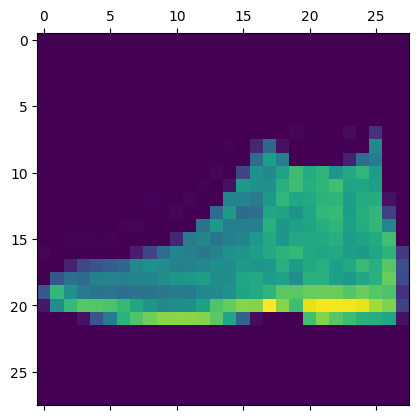

In [9]:
#testing images
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
#we will get the index output from neural net not actual label

test_index = 0 #try changing this index [0, len(x_test)]
test_output = model.predict(x_test) #predict for all images
result_index = np.argmax(test_output[test_index]) #get result of test index

print('Predicted: ', labels[result_index])
print('Actual: ', labels[y_test[test_index]])
plt.matshow(x_test[test_index])